<a href="https://colab.research.google.com/github/chethandr2428-sketch/SCT_DS_3/blob/main/TASK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib import pylab
%matplotlib notebook
%matplotlib inline
pylab.rcParams['figure.figsize'] = (3, 3)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df=pd.read_csv("/content/bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
df.groupby('y').mean(numeric_only=True).T

y,no,yes
age,40.838986,41.670070
balance,1303.714969,1804.267915
day,15.892290,15.158253
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968
previous,0.502154,1.170354


In [7]:
df.groupby('job').mean(numeric_only=True).T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,39.289886,40.044081,42.190989,46.415323,40.449567,61.626767,40.484484,38.740250,26.542644,39.314598,40.961627,47.593750
balance,1135.838909,1078.826654,1521.470074,1392.395161,1763.616832,1984.215106,1647.970868,997.088108,1388.060768,1252.632092,1521.745971,1772.357639
day,15.564301,15.442561,15.702085,16.002419,16.114189,15.439488,16.027866,15.635532,14.897655,16.408582,15.498081,14.642361
duration,246.896732,262.901562,256.309348,245.825000,253.995771,287.361307,268.157061,259.318729,246.656716,252.904962,288.543361,237.611111
campaign,2.575324,2.816995,2.799597,2.820968,2.864348,2.346731,2.853072,2.718344,2.299574,2.906805,2.432080,3.309028
pdays,47.859021,44.033498,32.486214,21.505645,38.665468,37.443905,34.747308,41.995185,57.041578,37.195077,34.146585,20.982639
previous,0.671630,0.505138,0.478144,0.371774,0.668006,0.638693,0.551615,0.501204,0.953092,0.574569,0.466616,0.319444


In [8]:
from numpy._core import numeric
df.groupby('marital').mean(numeric_only=True).T

marital,divorced,married,single
age,45.782984,43.408099,33.703440
balance,1178.872287,1425.925590,1301.497654
day,15.796428,15.854487,15.708210
duration,262.517188,253.412765,266.497967
campaign,2.630882,2.842875,2.649805
pdays,41.001728,37.950467,44.652385
previous,0.551373,0.556552,0.642690


In [10]:
df.groupby('education').mean(numeric_only=True).T

education,primary,secondary,tertiary,unknown
age,45.865567,39.964270,39.593640,44.510501
balance,1250.949934,1154.880786,1758.416435,1526.754443
day,15.421398,15.759159,16.086535,15.810985
duration,255.933002,258.685760,258.518532,257.313947
campaign,2.834331,2.700802,2.825577,2.849219
pdays,36.081740,42.353504,39.024134,36.856220
previous,0.489272,0.567753,0.661980,0.488422


Ratio of classes (no : yes) 0.8830151954170445 : 0.11698480458295547


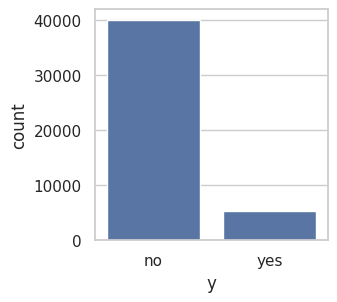

In [12]:
ratio = df.y[df.y == "yes"].count() / df.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(x=df.y)
plt.show()

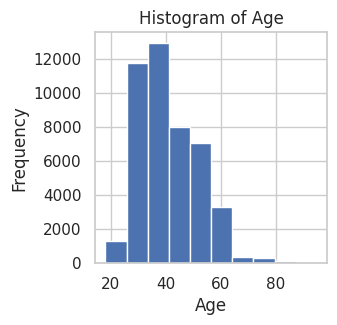

In [13]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

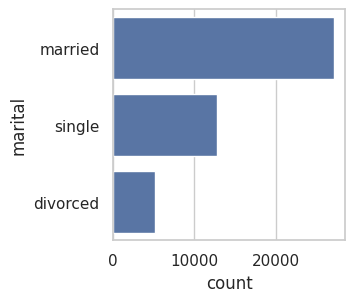

In [16]:
sns.countplot(y=df.marital, data=df)
plt.show()

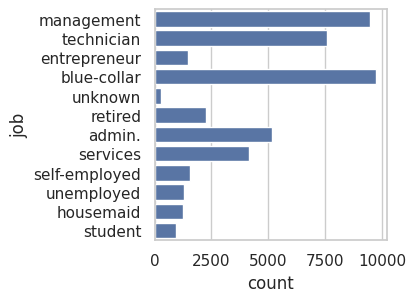

In [17]:
sns.countplot(y=df.job,data=df)
plt.show()


Looking for interesting facts

In [18]:
print('check 1: ', df.groupby(['loan','y']).size())
print('\n\ncheck 2: ', df.groupby(['job','y']).size())
print('\n\ncheck 3: ', df.groupby(['marital','y']).size())
print('\n\ncheck 4: ', df.groupby(['education','y']).size())
print('\n\ncheck 5: ', df.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', df.groupby(['month','y']).size())
print('\n\ncheck 7: ', df.groupby(['y', 'default']).size())

check 1:  loan  y  
no    no     33162
      yes     4805
yes   no      6760
      yes      484
dtype: int64


check 2:  job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64


check 3:  marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
dtype: int64


check 4:  education 

/tmp/ipython-input-2446284946.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
/tmp/ipython-input-2446284946.py:7: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.01}` instead.

  sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


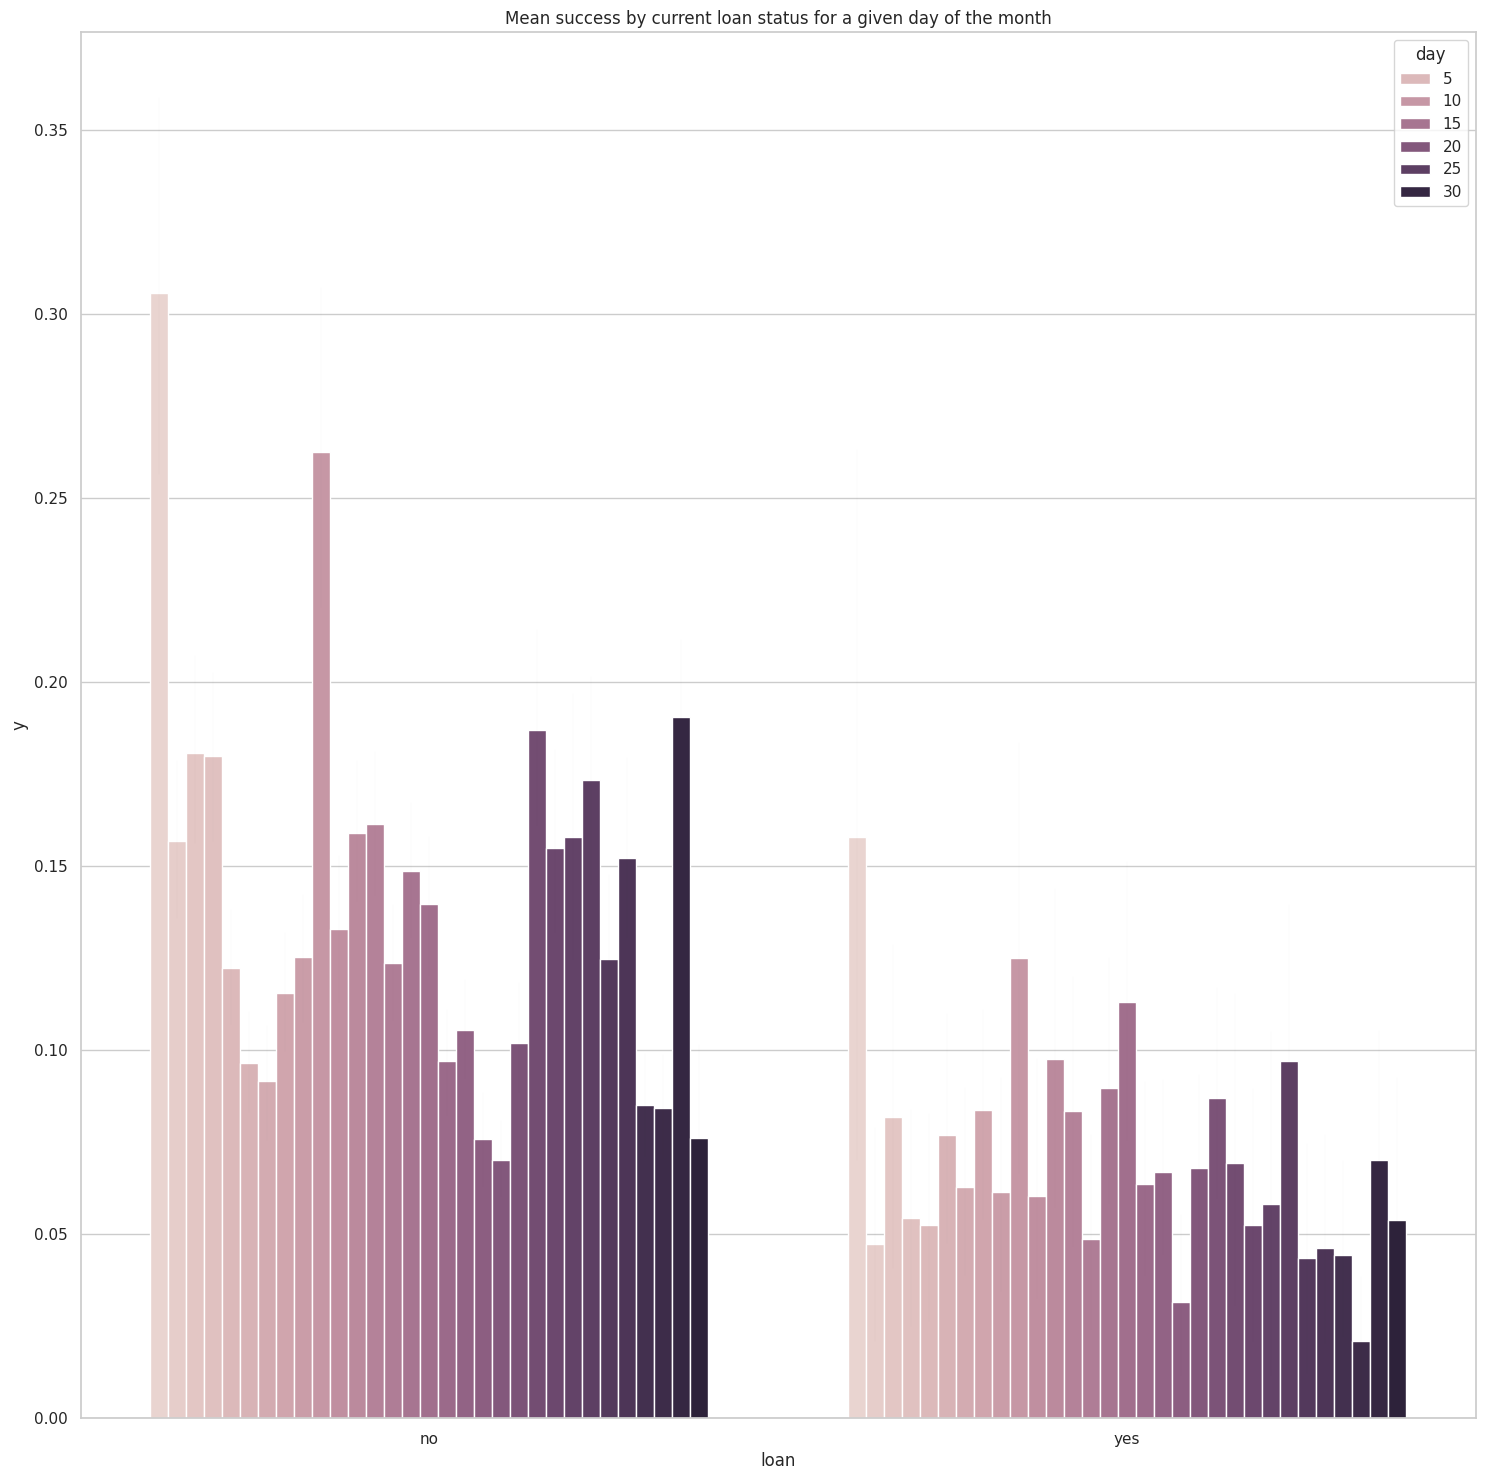

In [19]:

#Label Encoding the class attribute
label_encoder = LabelEncoder()
label_encoder.fit(df["y"])
df["y"] = label_encoder.transform(df["y"])

pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'loan', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.title('Mean success by current loan status for a given day of the month')
plt.show()

/tmp/ipython-input-2229051322.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'job', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
/tmp/ipython-input-2229051322.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.01}` instead.

  sns.barplot(x = 'job', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


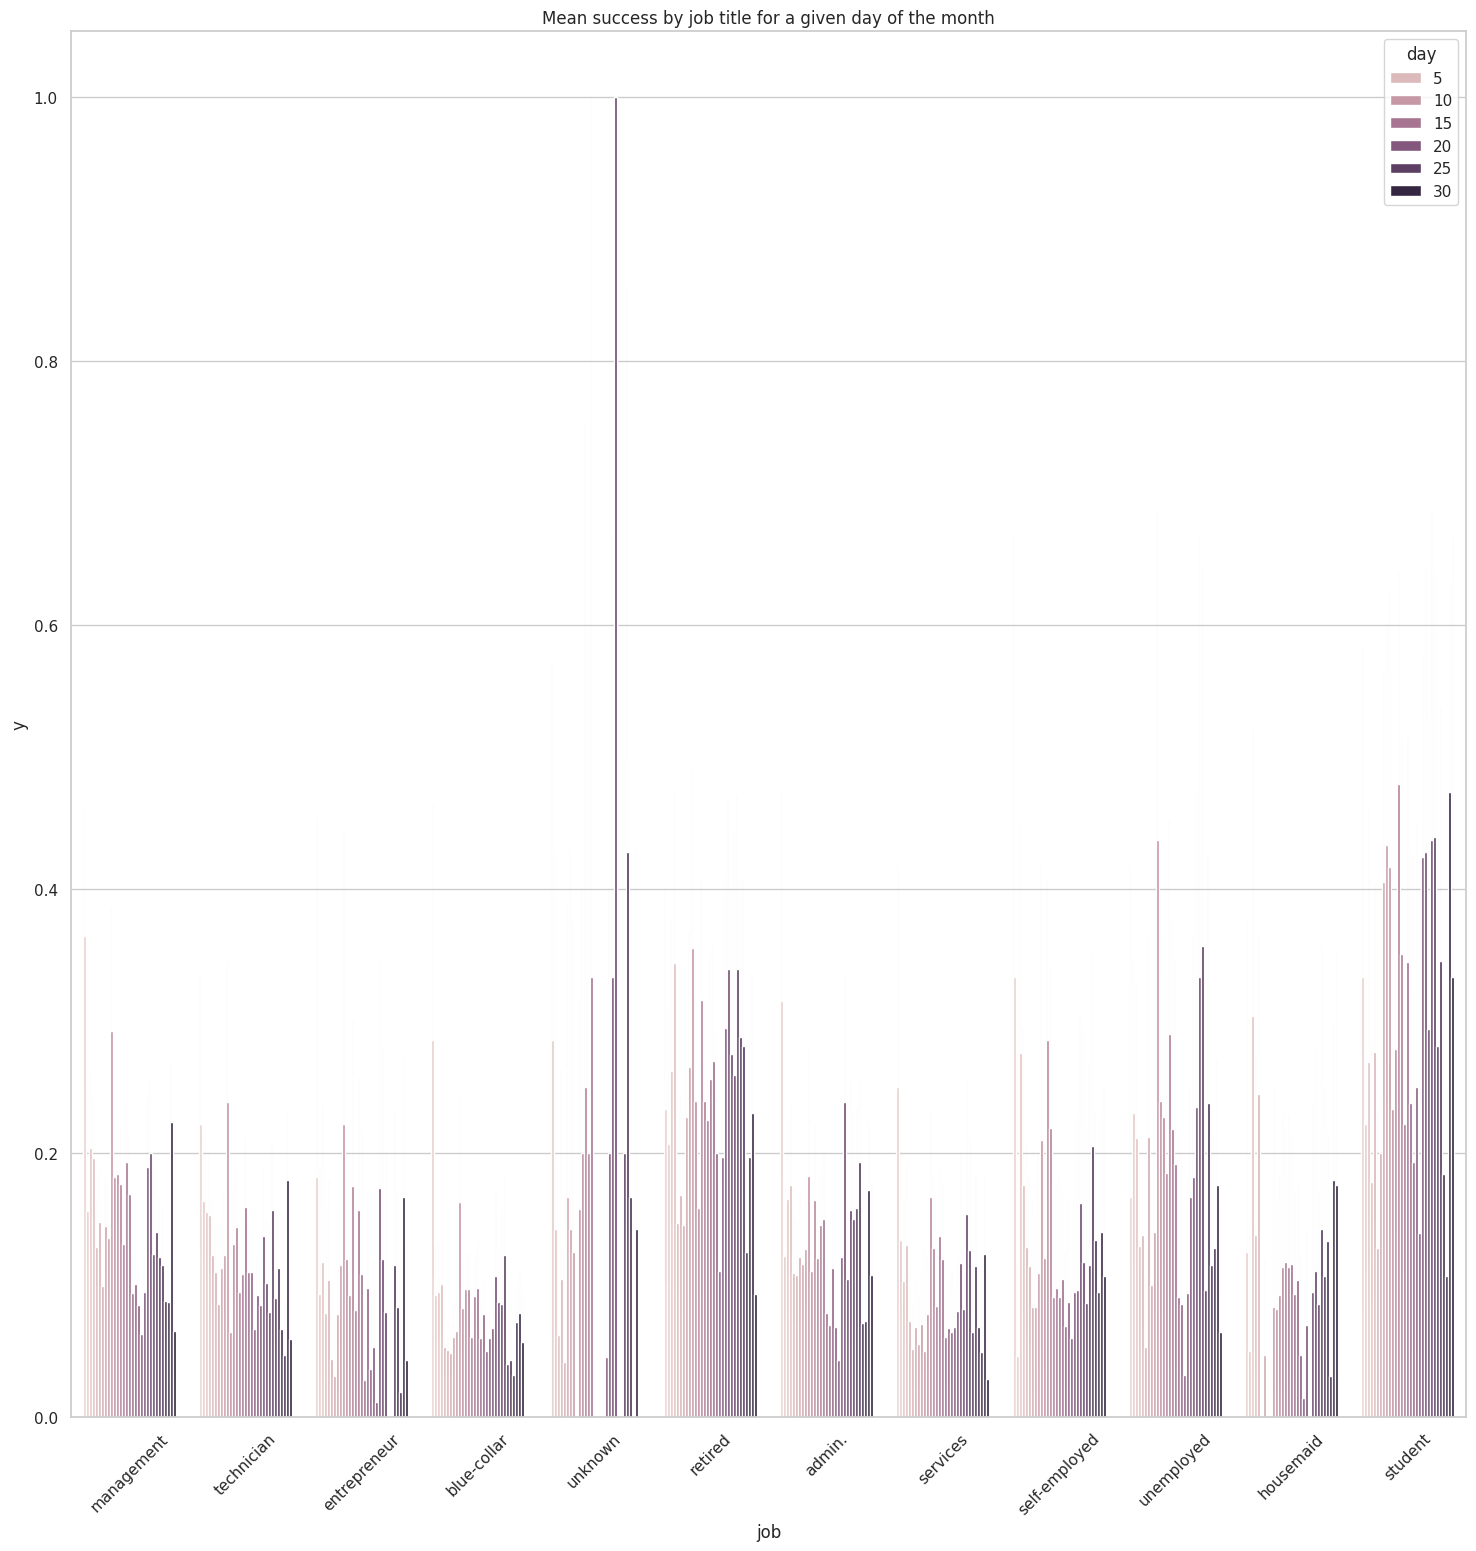

In [20]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'job', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by job title for a given day of the month')
plt.show()

/tmp/ipython-input-579522563.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'marital', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
/tmp/ipython-input-579522563.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.01}` instead.

  sns.barplot(x = 'marital', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


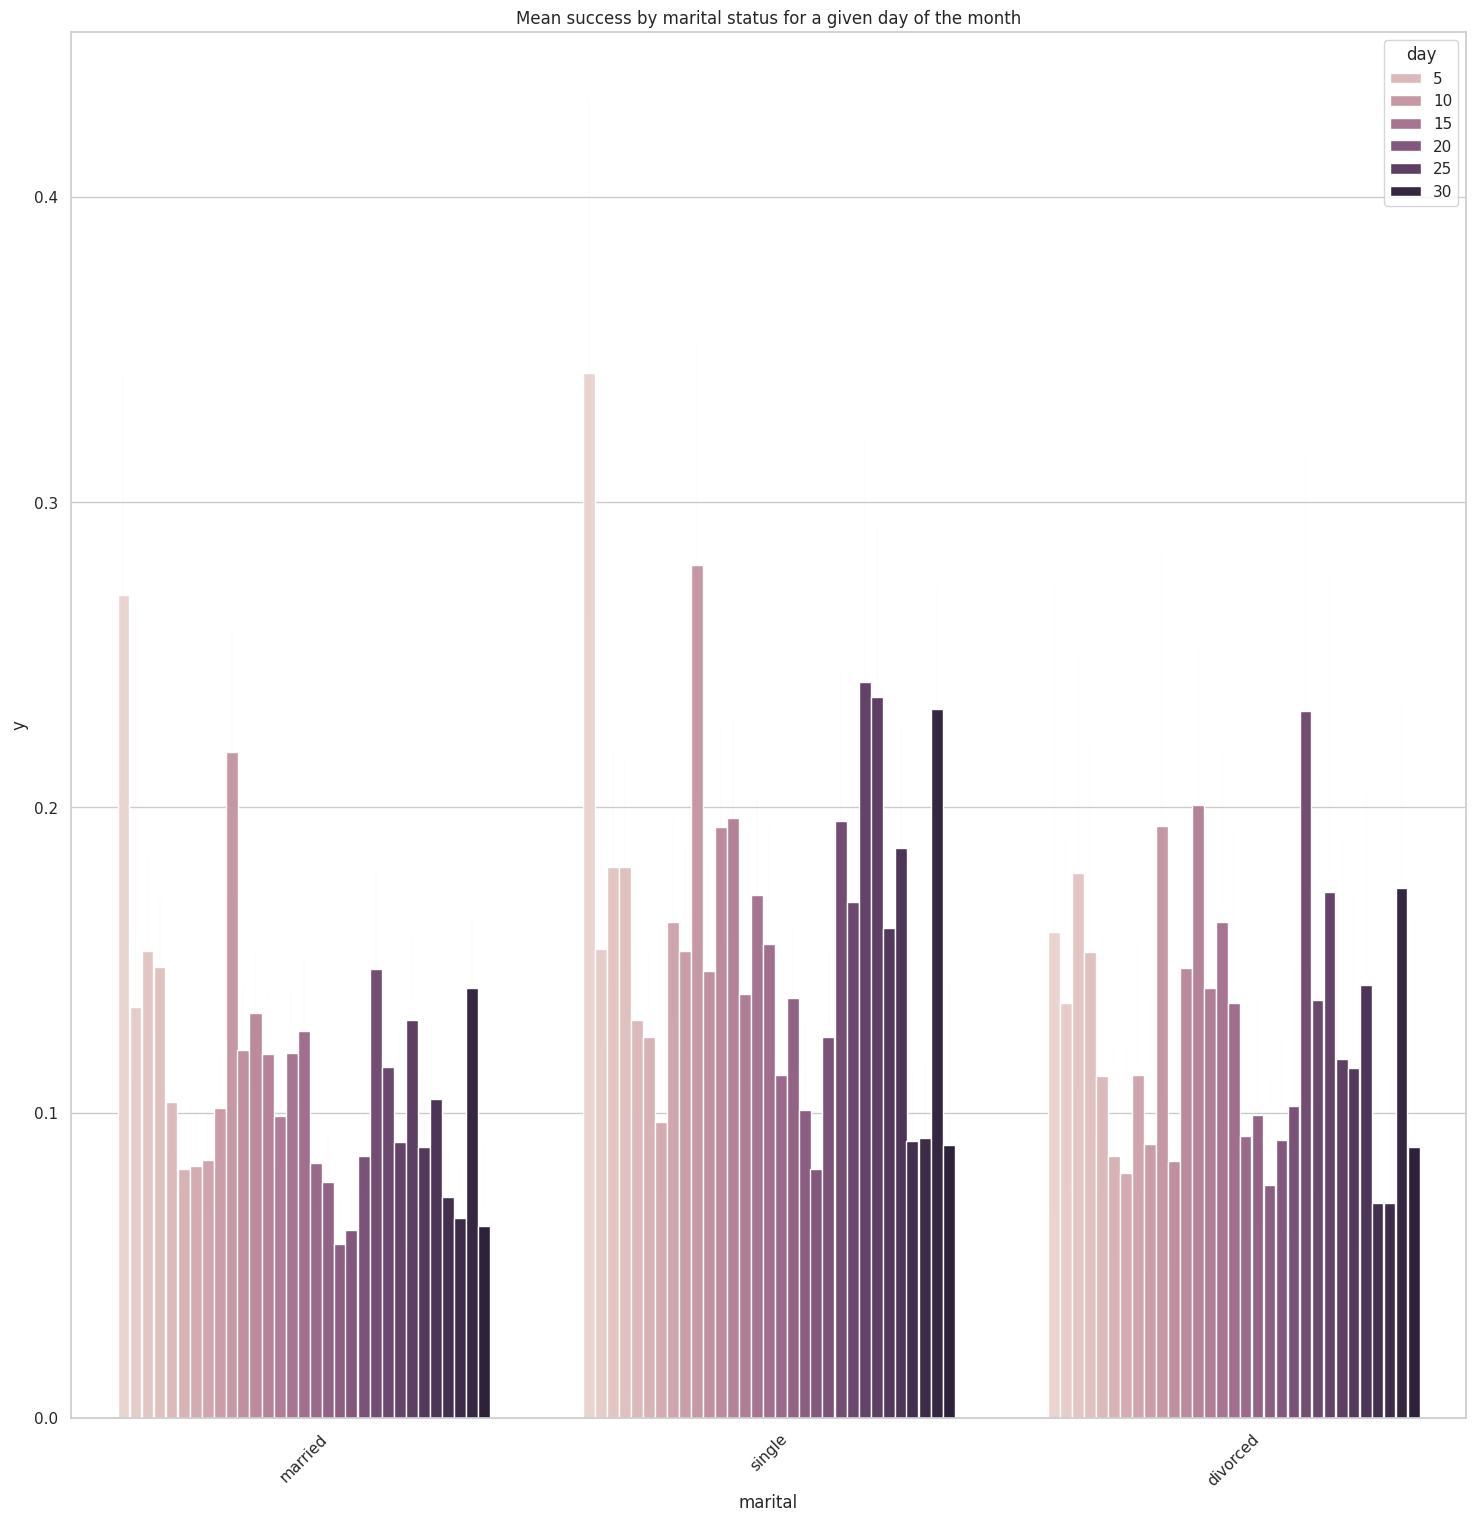

In [21]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'marital', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by marital status for a given day of the month')
plt.show()

/tmp/ipython-input-990793168.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x = 'education', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
/tmp/ipython-input-990793168.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.01}` instead.

  sns.barplot(x = 'education', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)


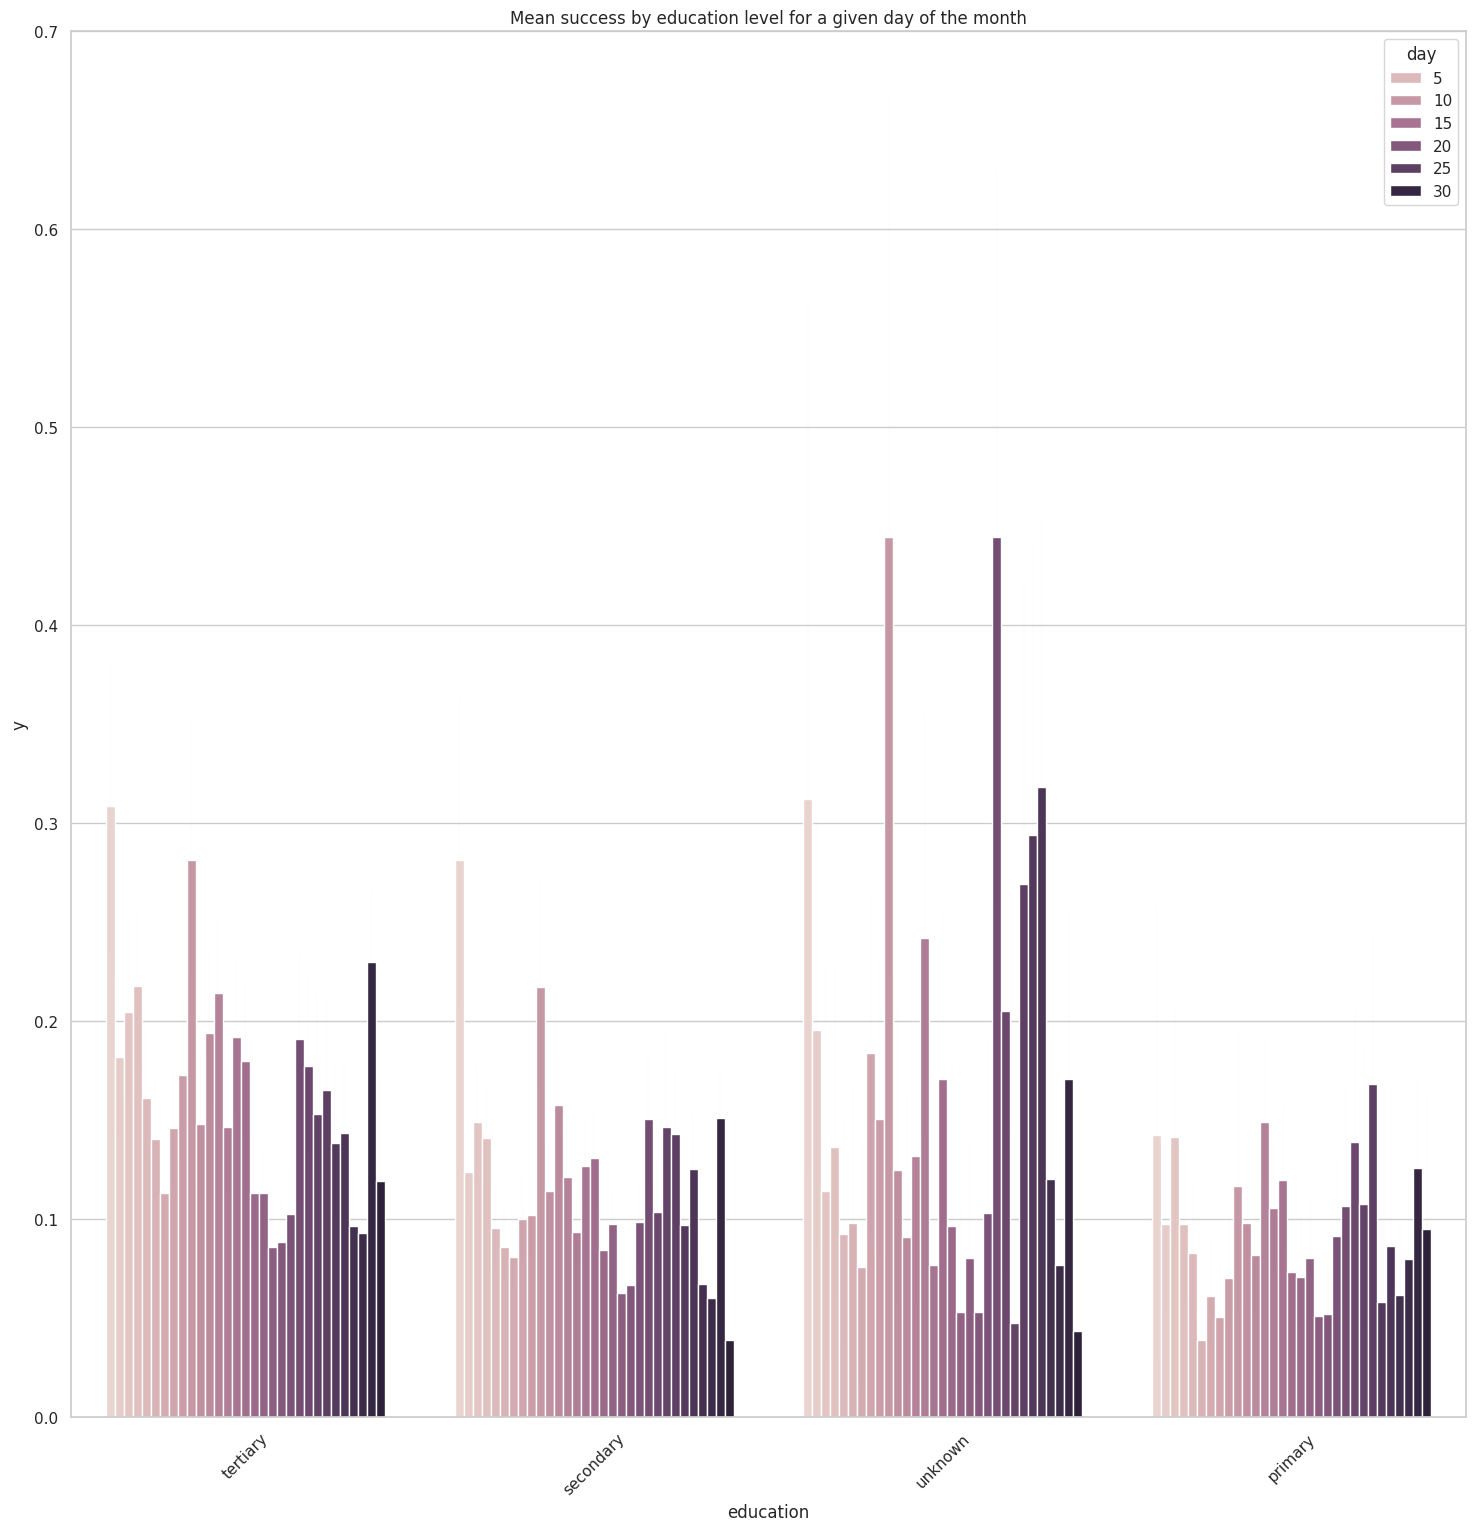

In [22]:
pylab.rcParams['figure.figsize'] = (18, 18)
sns.barplot(x = 'education', y = 'y', hue = 'day', data = df, ci=95, errwidth = 0.01)
plt.xticks(rotation=45)
plt.title('Mean success by education level for a given day of the month')
plt.show()

/tmp/ipython-input-130806457.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)
/tmp/ipython-input-130806457.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0.01}` instead.

  sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)


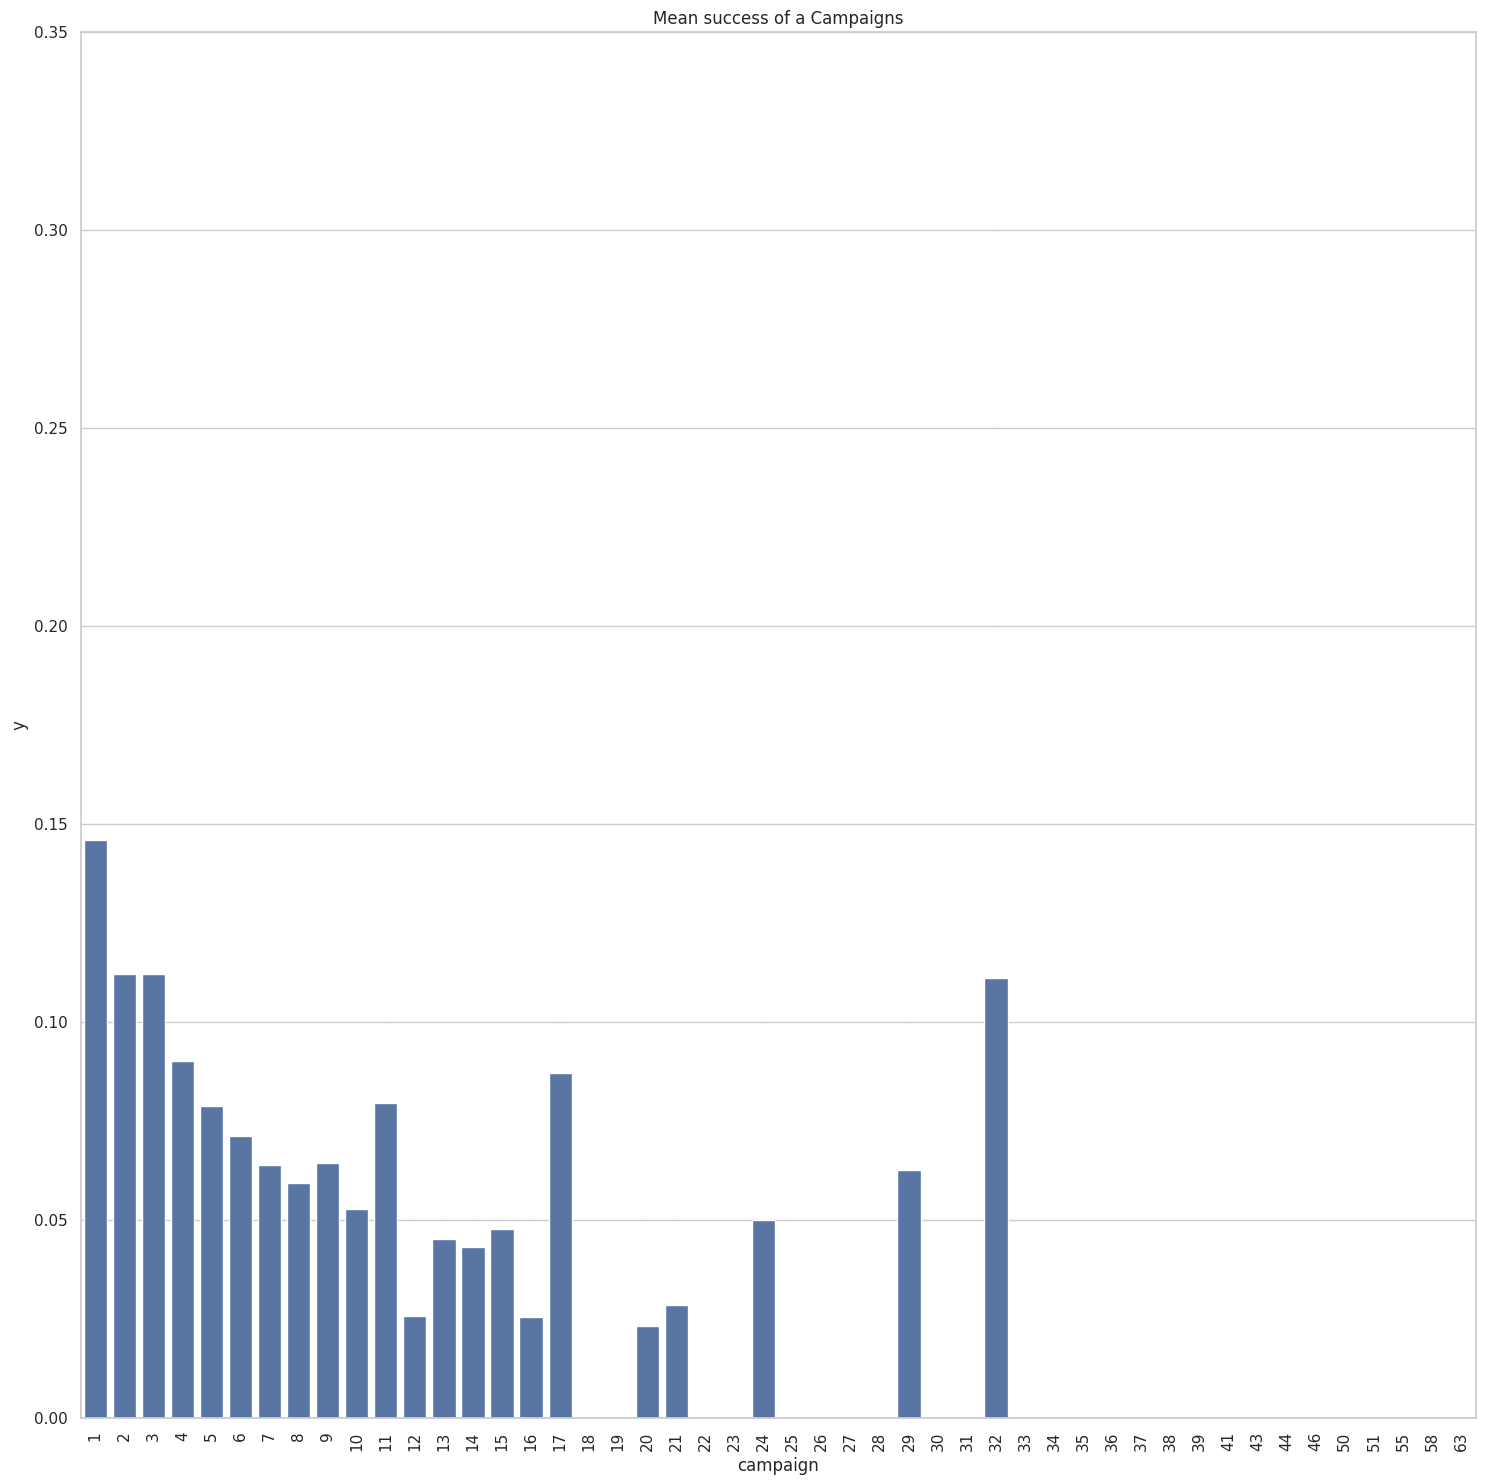

In [23]:
sns.barplot(x="campaign", y="y", data=df, ci=95, errwidth = 0.01)
plt.xticks(rotation=90)
plt.title('Mean success of a Campaigns')
plt.show()

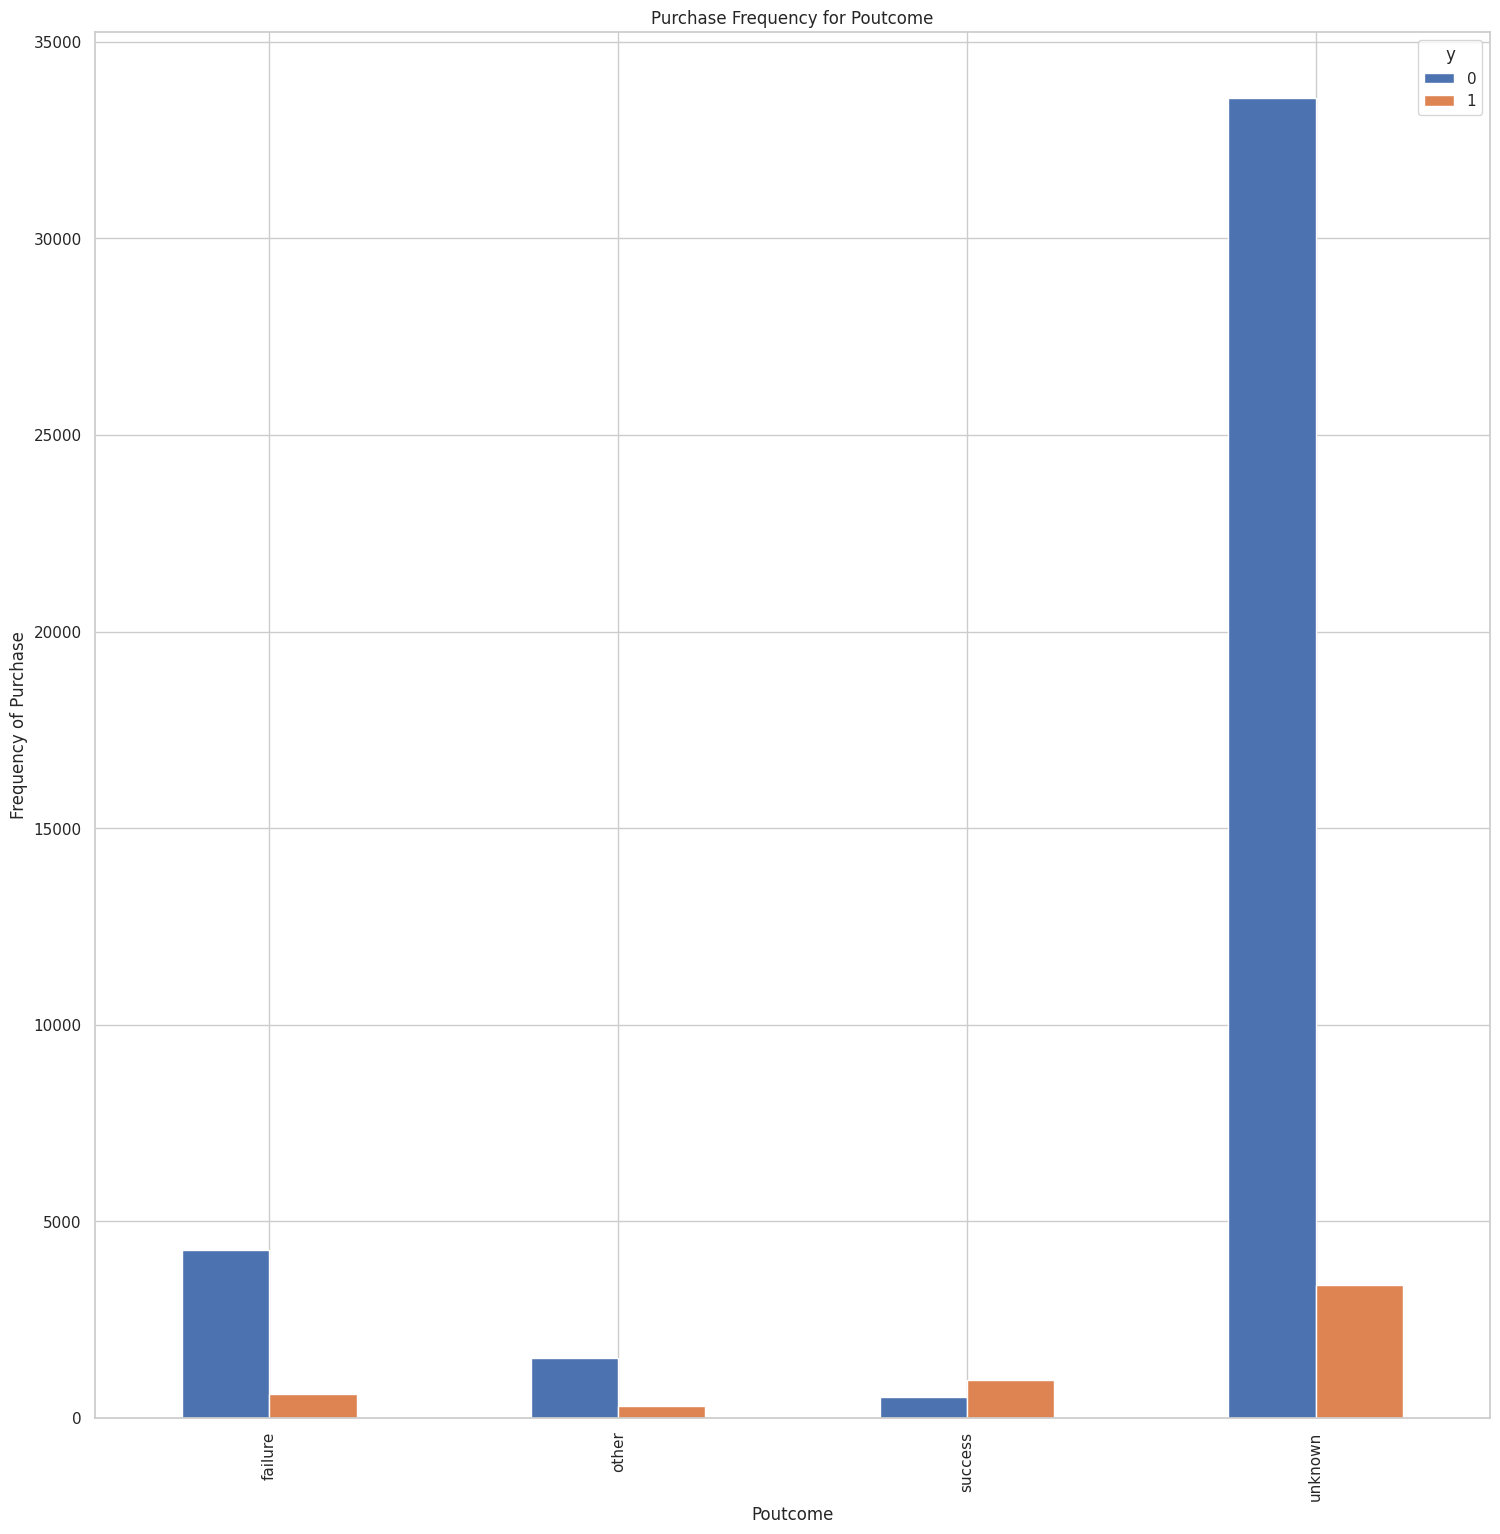

In [24]:
pd.crosstab(df.poutcome, df.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

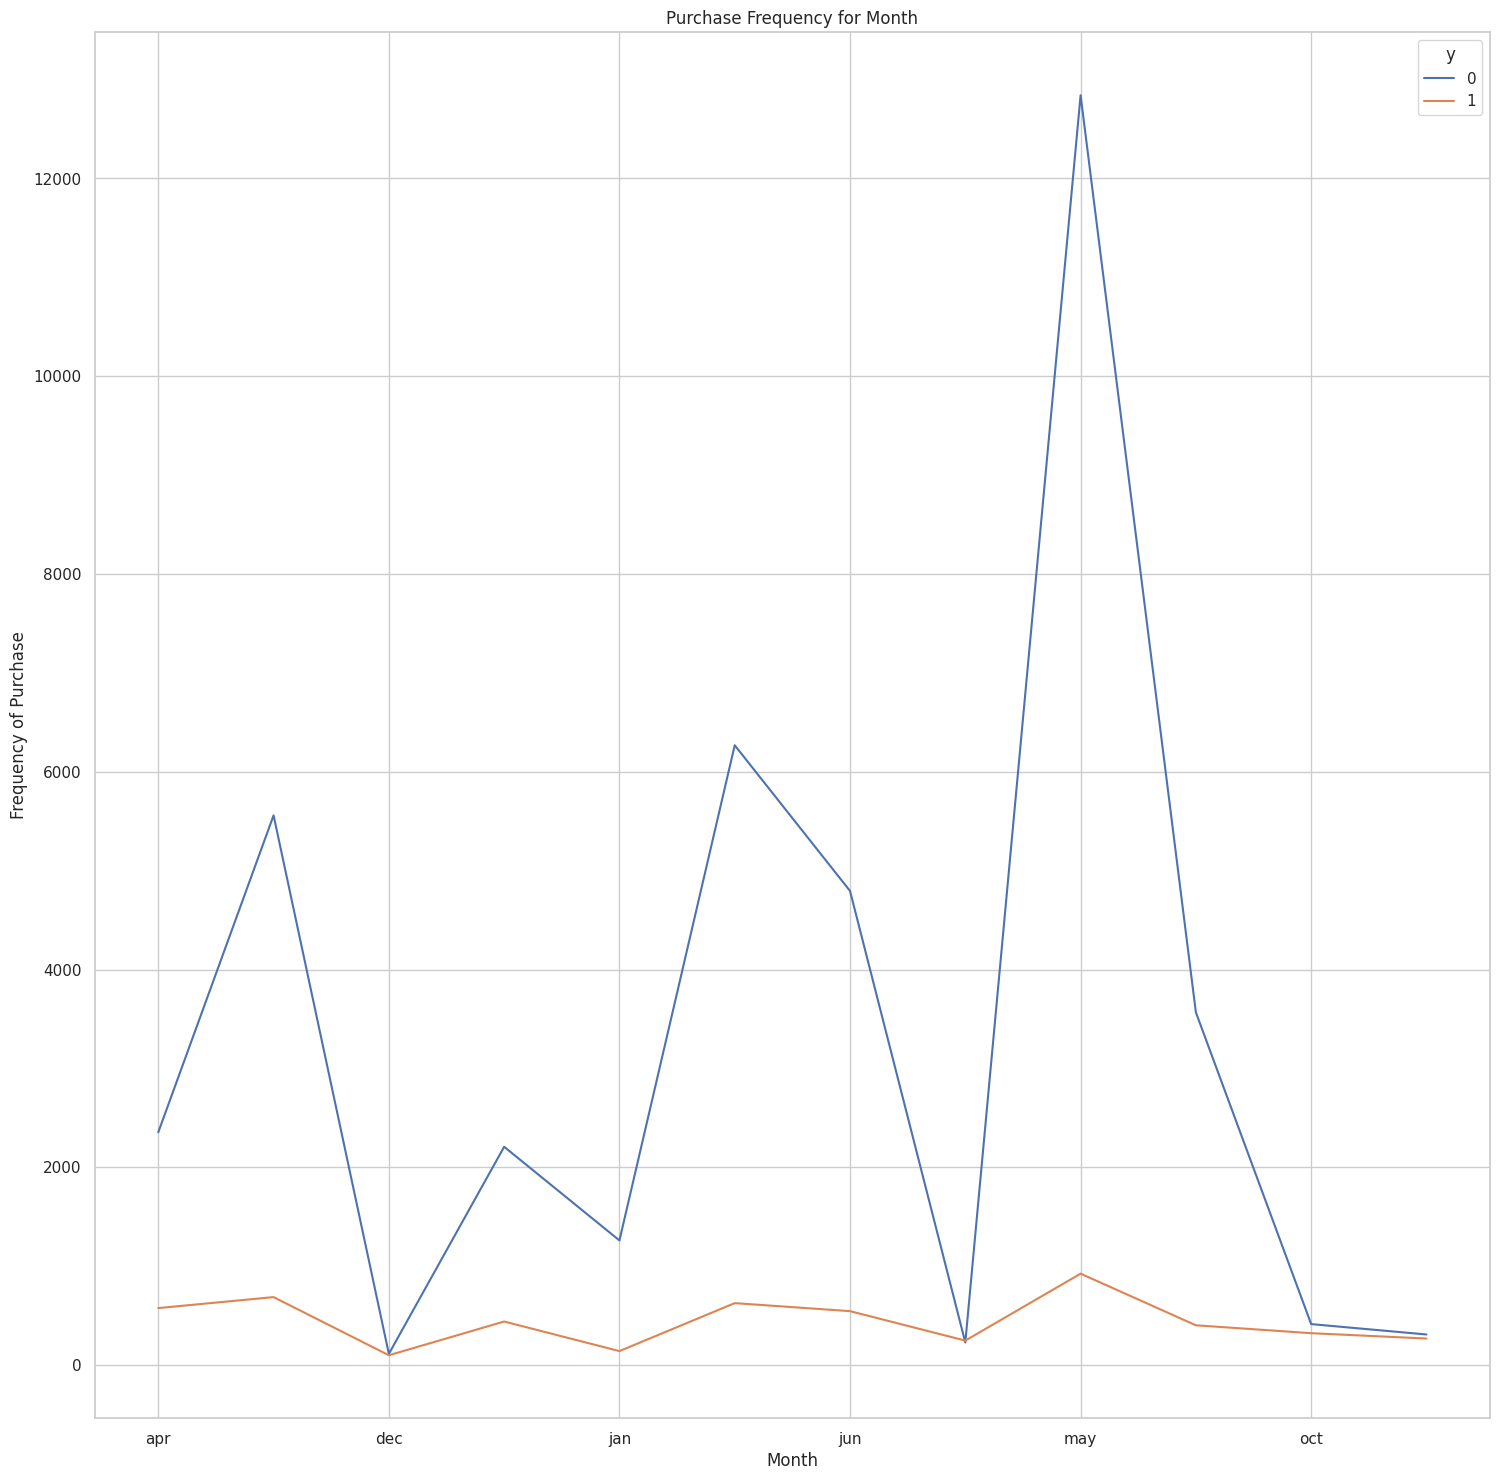

In [25]:
pd.crosstab(df.month, df.y).plot(kind='line')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

Creating some categorical Attributes

In [30]:
df['bal_sign'] = pd.Series(df['balance'] > 0)

Encoding the Binary Attributes

In [32]:
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [33]:
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month', 'day']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

In [34]:
df_corr = df.corr()

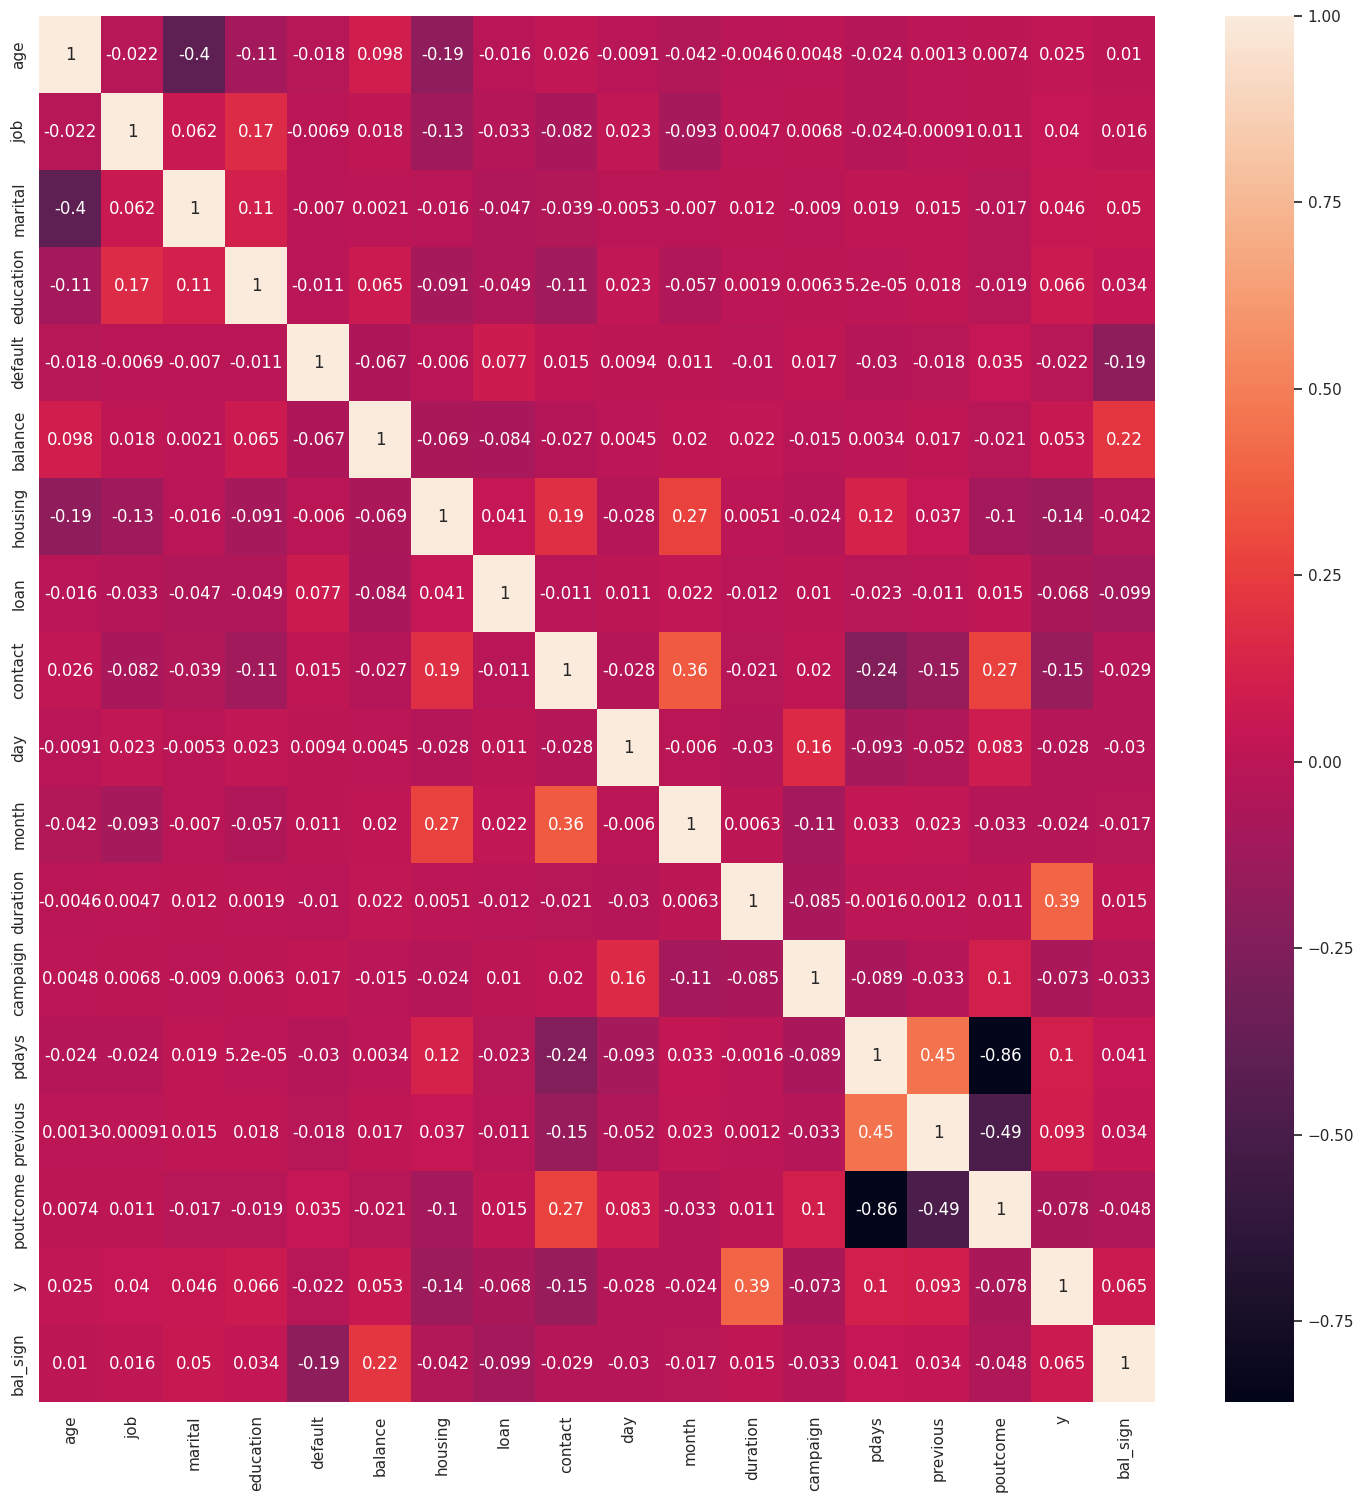

In [35]:
plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

From the above plot we can observe that most of the features are independent of each other.
Feature-pair (pdays - previous) is highly negatively correlated.

In [36]:
final_df = df.drop(["pdays"], axis = 1)

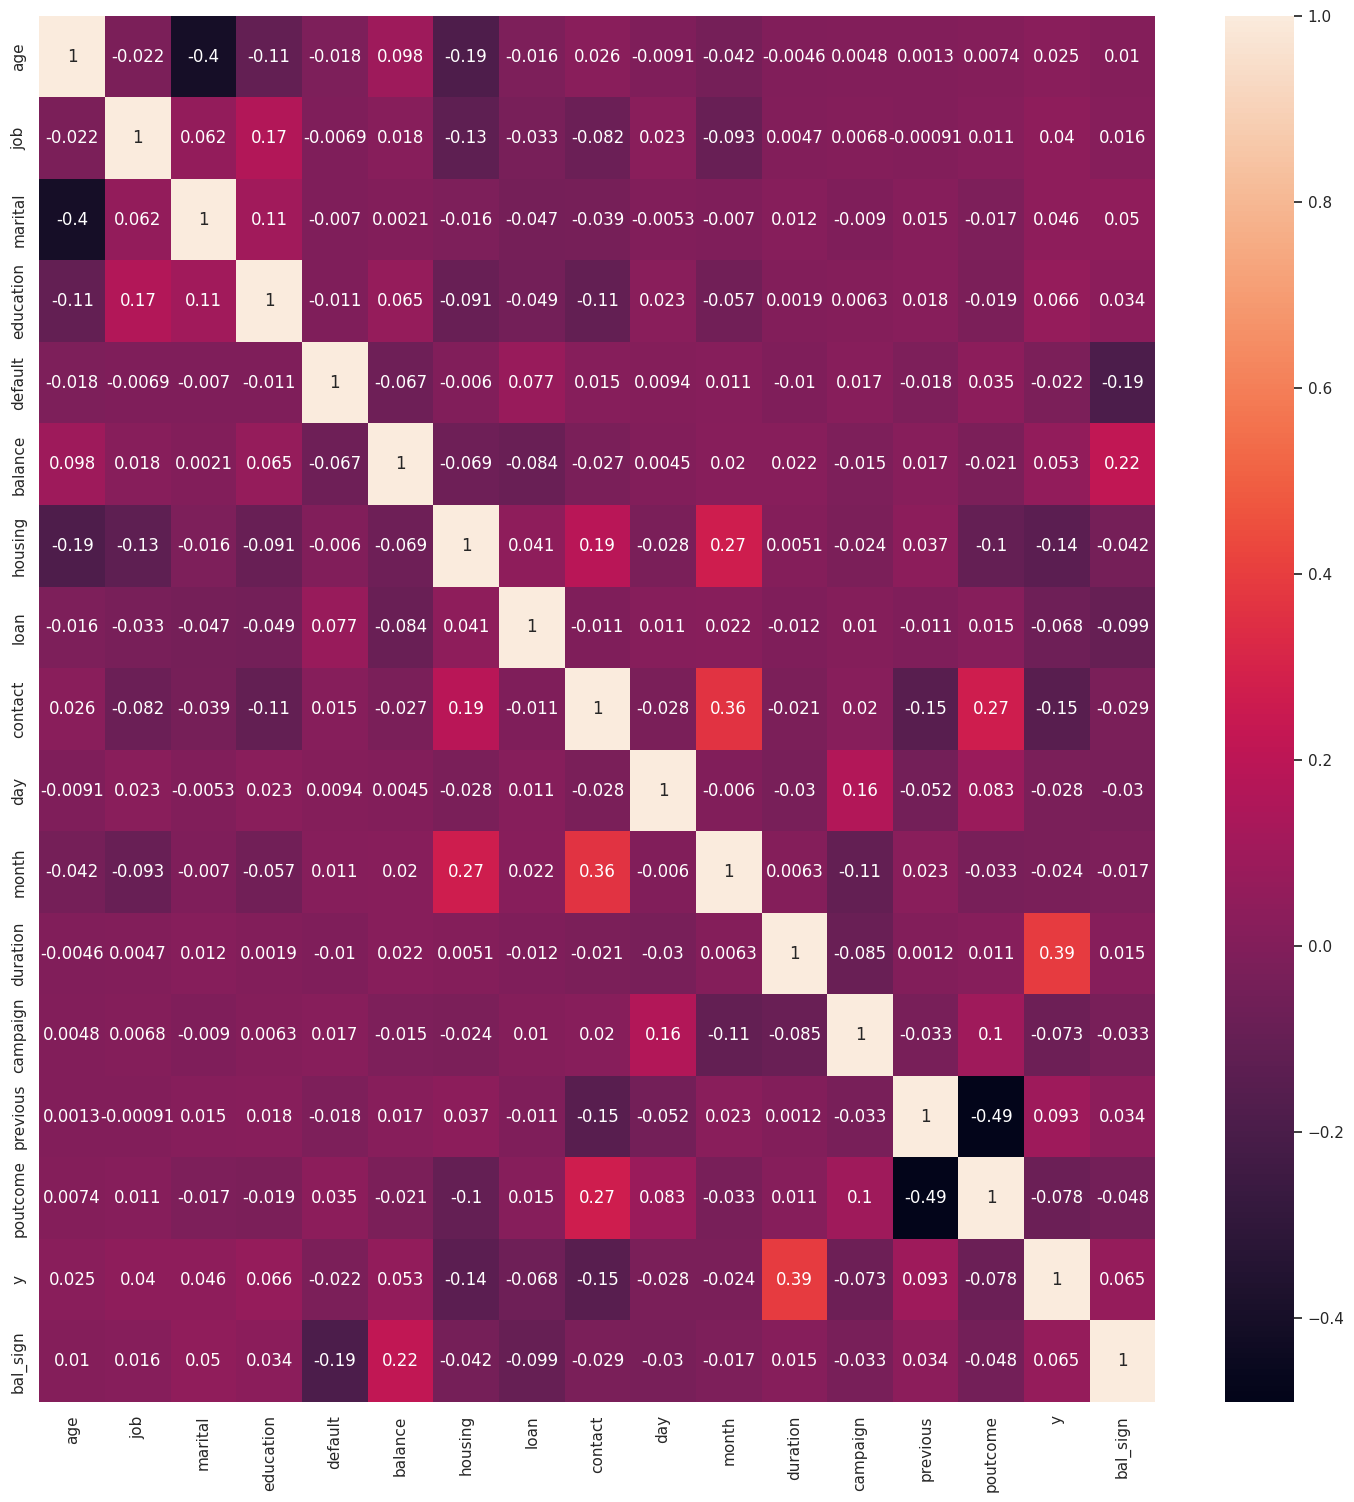

In [37]:
df_corr = final_df.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(df_corr, annot = True)
plt.show()

In [46]:
# Re-read the DataFrame to ensure original categorical columns are present
df = pd.read_csv('/content/bank-full.csv', sep=';')

# Label Encode the target variable 'y'
label_encoder_y = LabelEncoder()
label_encoder_y.fit(df["y"])
df["y"] = label_encoder_y.transform(df["y"])

# Label Encode binary-like attributes
labels_binary = ['housing', 'default', 'loan']
for label in labels_binary:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])

# One-hot encode multi-category attributes
cols_onehot = ['job', 'contact', 'marital', 'education', 'poutcome', 'month', 'day']
df = pd.get_dummies(df, columns=cols_onehot)

df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,58,0,2143,1,0,261,1,-1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,44,0,29,1,0,151,1,-1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,33,0,2,1,1,76,1,-1,0,0,...,False,False,False,False,False,False,False,False,False,False
3,47,0,1506,1,0,92,1,-1,0,0,...,False,False,False,False,False,False,False,False,False,False
4,33,0,1,0,0,198,1,-1,0,0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


Normalizing the Features

In [48]:
labels = df.y
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(df.drop(['y'], axis = 1)), columns = df.drop(['y'], axis = 1).columns)

In [49]:
features.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_admin.,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.519481,0.0,0.092259,1.0,0.0,0.053070,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.337662,0.0,0.073067,1.0,0.0,0.030704,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.194805,0.0,0.072822,1.0,1.0,0.015453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.376623,0.0,0.086476,1.0,0.0,0.018707,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.194805,0.0,0.072812,0.0,0.0,0.040260,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Splitting Data into Training and Testing data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1, stratify = labels)

In [52]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)
testing = pd.DataFrame(columns = ["Classifier", "F1-Score", "AUC", "Accuracy"])

Logistic Regression

In [ ]:
params = [
            {
                "penalty" : ['l2'],
                "C" : [0.01, 0.1, 1.0, 10.0],
                "solver" : ["sag"],
                "max_iter" : [100, 200]
            },
            {
                "penalty" : ['l1'],
                "C" : [0.01, 0.1, 1.0, 10.0],
                "solver" : ["saga"],
                "max_iter" : [100, 200]
            }
]
clf = GridSearchCV(estimator = LogisticRegression(n_jobs = -1, class_weight = "balanced"), param_grid = params, cv = cv,
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

In [55]:
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       n_jobs=-1,
       param_grid=[{'solver': ['sag'], 'penalty': ['l2'], 'max_iter': [100, 200], 'C': [0.01, 0.1, 1.0, 10.0]}, {'solver': ['saga'], 'penalty': ['l1'], 'max_iter': [100, 200], 'C': [0.01, 0.1, 1.0, 10.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=LogisticRegression(class_weight='balanced',
                                          multi_class='ovr', n_jobs=-1,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l2'], 'solver': ['sag']},
                         {'C': [0.01, 0.1, 1.0, 10.0], 'max_iter': [100, 200],
                          'penalty': ['l1'], 'solver': ['saga']}],
             return_train_score='warn', scoring='f1')

In [56]:
clf.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}

In [57]:
clf.best_score_

np.float64(0.5617102816109443)

In [58]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Logistic Regression", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.551
Area under ROC on test data is : 0.830
Accuracy on test data is : 0.845


Decision Tree Classifier

In [60]:
params = {
            "criterion" : ["gini", "entropy"],
            "splitter" : ["best", "random"],
            "max_depth" : [25, 50, 75, None],
            "min_samples_split" : [3, 6],
            "min_samples_leaf" : [2, 4],
        }
clf = GridSearchCV(estimator = DecisionTreeClassifier(class_weight = "balanced"), param_grid = params, cv = cv,
                   n_jobs = -1, scoring = "f1")
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50, 75, None],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [62]:
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best'),
       n_jobs=-1,
       param_grid={'splitter': ['best', 'random'], 'max_depth': [25, 50, 75], 'min_samples_split': [3, 6], 'min_samples_leaf': [2, 4], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise',
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [25, 50, 75], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 6],
                         'splitter': ['best', 'random']},
             return_train_score='warn', scoring='f1')

In [63]:
f1_score(y_test, clf.predict(X_test))

0.5308436145381794

In [64]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 75,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'random'}

In [65]:
clf.best_score_

np.float64(0.5282373098983596)

In [66]:
f1 = f1_score(y_test, clf.predict(X_test))
auc = roc_auc_score(y_test, clf.predict(X_test))
acc = accuracy_score(y_test, clf.predict(X_test))

print("F1-Score on test data is : %0.3f" %f1)
print("Area under ROC on test data is : %0.3f" %auc)
print("Accuracy on test data is : %0.3f" %acc)

testing.loc[-1] = ["Random Forest", f1, auc, acc]
testing.index = testing.index + 1
testing = testing.sort_index()

F1-Score on test data is : 0.531
Area under ROC on test data is : 0.804
Accuracy on test data is : 0.844
